<a href="https://colab.research.google.com/github/talisma-cassoma/plant-disease-study/blob/main/disease_severity_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remove Background
Remove Background notebook by using rembg

## Setup

In [2]:
!pip install -qq rembg==2.0.28
!pip install -qq pillow==9.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.8 MB/s eta 0:

## Remove Background

Reset files

In [3]:
!rm -rf /content/output
!mkdir /content/output

Upload files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Remove background processing

In [5]:
!rembg p /content/drive/MyDrive/plant-disease-segmentation-dataset/working/legiont/image/img/  /content/output

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 371GB/s]
  4% 24/588 [01:07<26:16,  2.80s/it]

Aborted!


# segmentation


read model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,UpSampling2D
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from tensorflow.keras.models import load_model

# Define the path to your saved model
model_path = '/content/drive/MyDrive/plant-disease-segmentation-dataset/tmp/model/custom_leaf_segmentation.h5'

# Load the model
model = load_model(model_path)
# Summarize the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                            

1/1 [==============================] - 1s 681ms/step


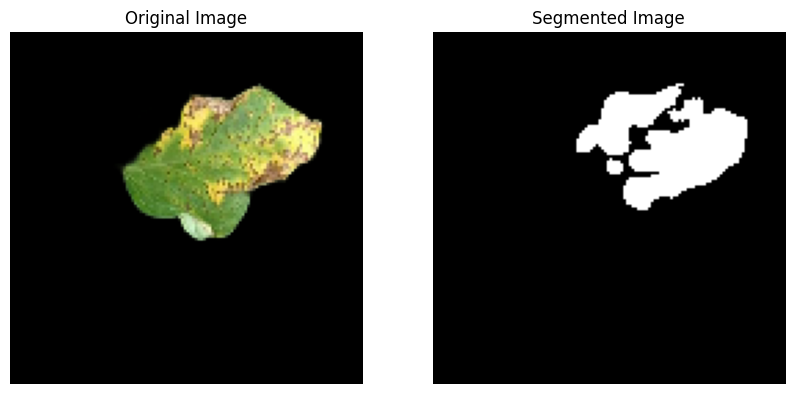

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/output/00052_1.png'
img = image.load_img(img_path, target_size=(128, 128))  # Adjust target_size according to your model's input shape

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


# Make prediction
prediction = model.predict(img_array)

# Assuming prediction is a segmentation mask, apply it to the input image
segmented_img = np.squeeze(prediction)  # Remove batch dimension if present
segmented_img = np.where(segmented_img > 0.5, 1, 0)  # Apply a threshold to get binary segmentation mask
#segmented_img *= 255  # Scale mask to [0, 255]

# Convert segmented_img to uint8 for compatibility with PIL
segmented_img_uint8 = segmented_img.astype(np.uint8) * 255
# Create a PIL Image object from the segmented image array
segmented_pil_img = Image.fromarray(segmented_img_uint8)
# Save the segmented image as a PNG file
segmented_pil_img.save("segmented_image.png")


# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()

# area estimation

print the health area

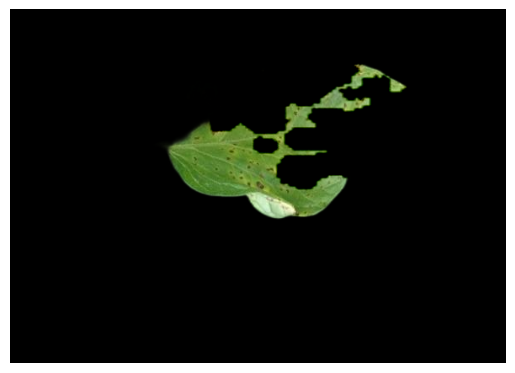

In [9]:
import cv2
import matplotlib.pyplot as plt

# Read the images
image1 = cv2.imread('/content/output/00052_1.png')
image2 = cv2.imread('/content/segmented_image.png')

# Resize the images to have the same shape
image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Subtract the images
subtracted = cv2.subtract(image1, image2_resized)

# Display the result image using matplotlib
plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Display the original and segmented images the two images (origal and health area)
#plt.figure(figsize=(10, 5))
# Original image
#plt.subplot(1, 2, 1)
#plt.imshow(img)
#plt.title('Original Image')
#plt.axis('off')
# Display the result image using matplotlib
#plt.subplot(1, 2, 2)
#plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
#plt.axis('off')  # Turn off axis numbers and ticks
#plt.title('health area')
#plt.show()


save and print infected area colored

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import cv2

# Load the input image
img_path = '/content/output/00052_1.png'
original_img = cv2.imread(img_path)

# Resize the original image to match the segmentation output size
resized_original_img = cv2.resize(original_img, (128, 128))

# Preprocess the image
img_array = image.img_to_array(resized_original_img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Assuming prediction is a segmentation mask, apply it to the original image
segmented_img = np.squeeze(prediction)  # Remove batch dimension if present
segmented_img = np.where(segmented_img > 0.5, 255, 0).astype(np.uint8)  # Apply a threshold and convert to uint8

# Resize the segmented image mask to match the dimensions of the original image
resized_segmented_img = cv2.resize(segmented_img, (original_img.shape[1], original_img.shape[0]), interpolation=cv2.INTER_NEAREST)

# Convert segmented_img to uint8 for compatibility with PIL
segmented_img_uint8 = resized_segmented_img.astype(np.uint8) * 255

# Create a PIL Image object from the segmented image array
segmented_pil_img = Image.fromarray(segmented_img_uint8)

# Save the segmented image as a PNG file
segmented_pil_img.save("segmented_image.png")

1/1 [==============================] - 0s 52ms/step
